# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [2]:
!pip install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=7cf6d634c262e3cffc371a599bd8ba75ccfe9c6f0cc86522c3f49707d684f90a
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 5.2 MB/s 


In [4]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [5]:
#uploading files from system to import them here in colab
from google.colab import files
files = files.upload()

Saving movie_actor_network.csv to movie_actor_network.csv


In [6]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [7]:
edges = [tuple(x) for x in data.values.tolist()]

In [8]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [9]:
A = list(nx.connected_component_subgraphs(B))[0] #getting all the connections in the graph

In [10]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


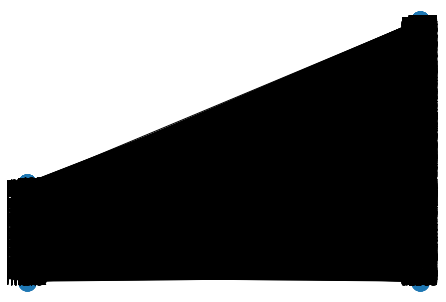

In [11]:
#creating bipartite sets - movies (label - 1) and actors (label - 2). Then plotting the same along with the connections between the two.
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l)) 
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [12]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [13]:
#Randomly selects a node then another to reach from the one previously selected and so on for each iteration.
# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [14]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [15]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [16]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

In [17]:
node_embeddings.shape

(4703, 128)

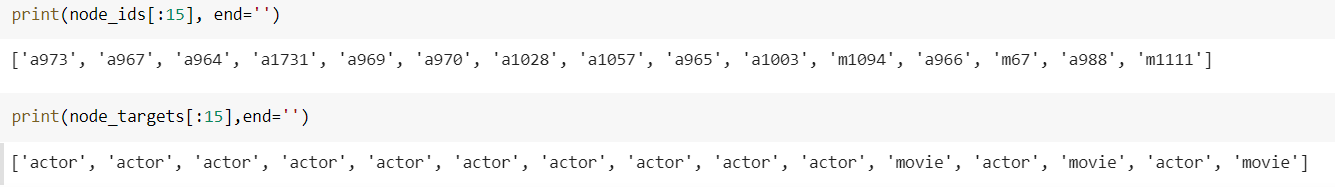

In [18]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    for i in range(len(node_ids)):
      if 'm' in node_ids[i]:
        movie_nodes.append(node_ids[i])
        movie_embeddings.append(node_embeddings[i])
      else:
        actor_nodes.append(node_ids[i])
        actor_embeddings.append(node_embeddings[i])
    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [19]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [20]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [21]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [22]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    #The maximum of connected components in the graph -> the function returns a set of nodes that are part of the longest connection 
    # i.e the connection which has the maximum no. of nodes
    cost1= len(max(nx.connected_components(graph)))/len(graph.nodes())
    
    return cost1/number_of_clusters

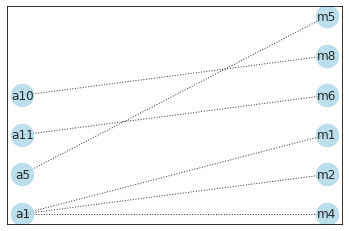

In [23]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [24]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [25]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    cost2= len(graph.edges())/len([x for x in set(graph.nodes()) if 'm' in x])
    
    return cost2/number_of_clusters

<font color='cyan'>Grader function - 4</font>

In [26]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [27]:
from sklearn.cluster import KMeans

clusters = [3, 5, 10, 30, 50, 100, 200, 500]
total_cost = {}
for c in clusters:
 model1 = KMeans(n_clusters = c).fit(actor_embeddings)
 labels = model1.labels_
 COST1 = 0
 COST2 = 0
 for i in range(c):
   cluster_nodes = np.where((labels == i))
   egos = np.array(actor_nodes)[cluster_nodes]
   G = nx.Graph()
   for e in egos:
     subgraph = nx.ego_graph(B, e)
     G.add_nodes_from(subgraph.nodes)
     G.add_edges_from(subgraph.edges())
   COST1 += cost1(G, c)
   COST2 += cost2(G, c)
 total_cost[c] = COST1*COST2
print(total_cost)

{3: 3.734891825142042, 5: 2.539175292259236, 10: 2.2938889266038136, 30: 1.7585200651374981, 50: 1.505295950687873, 100: 1.5292169239343842, 200: 1.6371217835383158, 500: 1.7265168345454027}


In [36]:
#Finding the optimal k and fitting the data using that k value.
optimal_k = [k for k in total_cost.keys() if total_cost[k]==max(total_cost.values())][0]
print("The value of optimal k is: ",optimal_k)

optimal_model = KMeans(n_clusters = optimal_k).fit(actor_embeddings)
labels_for_optimal = optimal_model.labels_

The value of optimal k is:  3


<font color='blue'>Displaying similar actor clusters</font>

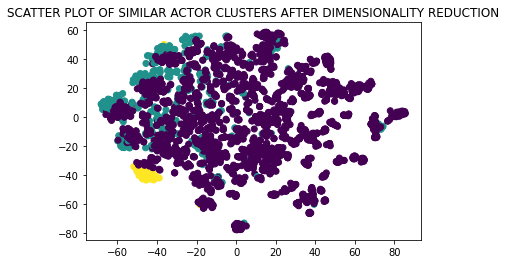

In [40]:
from sklearn.manifold import TSNE
actor_embeddings_2d = TSNE(n_components = 2).fit_transform(actor_embeddings)

plt.scatter(actor_embeddings_2d[:,0], actor_embeddings_2d[:,1], c = labels_for_optimal.astype(float))
plt.title("SCATTER PLOT OF SIMILAR ACTOR CLUSTERS AFTER DIMENSIONALITY REDUCTION")
plt.show()

<font color='blue'>Grouping similar movies</font>

In [44]:
#modified to accomodate the cost2 formula calculations for movie clustering
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    cost2= len(graph.edges())/len([x for x in set(graph.nodes()) if 'a' in x])
    
    return cost2/number_of_clusters

In [45]:
clusters = [3, 5, 10, 30, 50, 100, 200, 500]
total_cost = {}
for c in clusters:
 model1 = KMeans(n_clusters = c).fit(movie_embeddings)
 labels = model1.labels_
 COST1 = 0
 COST2 = 0
 for i in range(c):
   cluster_nodes = np.where((labels == i))
   egos = np.array(movie_nodes)[cluster_nodes]
   G = nx.Graph()
   for e in egos:
     subgraph = nx.ego_graph(B, e)
     G.add_nodes_from(subgraph.nodes)
     G.add_edges_from(subgraph.edges())
   COST1 += cost1(G, c)
   COST2 += cost2(G, c)
 total_cost[c] = COST1*COST2
print(total_cost)

{3: 2.905417701748463, 5: 2.605639617553022, 10: 1.9089047128678454, 30: 1.9891174887289167, 50: 1.843497509287282, 100: 1.540082506092833, 200: 1.3752132789793758, 500: 1.208063399602931}


In [46]:
#Finding the optimal k and fitting the data using that k value.
optimal_k = [k for k in total_cost.keys() if total_cost[k]==max(total_cost.values())][0]
print("The value of optimal k is: ",optimal_k)

optimal_model = KMeans(n_clusters = optimal_k).fit(movie_embeddings)
labels_for_optimal = optimal_model.labels_

The value of optimal k is:  3


<font color='blue'>Displaying similar movie clusters</font>

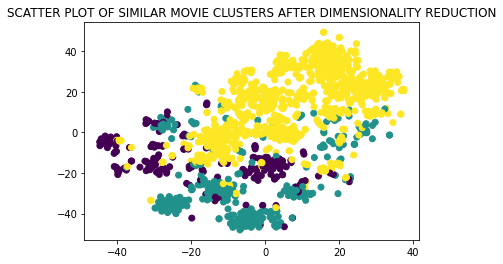

In [47]:
movie_embeddings_2d = TSNE(n_components = 2).fit_transform(movie_embeddings)

plt.scatter(movie_embeddings_2d[:,0], movie_embeddings_2d[:,1], c = labels_for_optimal.astype(float))
plt.title("SCATTER PLOT OF SIMILAR MOVIE CLUSTERS AFTER DIMENSIONALITY REDUCTION")
plt.show()